# Section15: 検定の誤りと検定力

## Type 1 error とType 2 error

例: 薬Aと薬Bで効果の平均に差があるか検定

- 帰無仮説: 差がない
- 対立仮説: 差がある

z分布について、棄却域にあるため帰無仮説を棄却し、対立仮説を採択する(p<.05)   
しかし、本当は効果の平均には差がない場合（本当は差がないのに、あることになってしまった）  
→ 第1種の誤り

z分布について、棄却域に入らないため、帰無仮説を棄却できず、採択した(p<.05)   
しかし、本当は効果の平均には差がない場合（本当は差があるのに、ないことになってしまった）  
→ 第2種の誤り


### 第一種の誤りが起こる確率

→ 有意水準と同じ. 
有意水準が5%であれば、Type1 errorが起こる確率は5%.  
"慌てて棄却するα"

### 第二種の誤りが起こる確率

- → β
- 帰無仮説が正しいとした時の検定統計量の分布を帰無分布
- 対立仮説が正しいとした時の検定統計量の分布を対立分布

βは、対立仮説としては正しいが、棄却域に入らないケース

### 検定力(power)


検定力 = 1 - β  
検定力に影響する要素

- 優位水準
- サンプルサイズ
- 帰無分布と対立分布


#### 有意水準

有意水準(α)を上げると、棄却域が大きくなり、検定力は高くなる。  
ただし、検定力を上げるためにαを上げるのはNG. αを上げることは、棄却しやすくなり、それだけ甘い検定になってしまう。特に理由がなければ 5%か1%を使う。

#### サンプルサイズ

標本を増やすと、分布の山が尖った形状になり、検定力は高くなる。  
ただし、単純にサンプルサイズを大きくすれば良いわけではない。
サンプルサイズが大きいと、βの値が小さくなり、検定力が高くなり有意差が出やすくなる  → 少しの差でも簡単に有意差が出てしまうのは、検定の本来の目的に反する（検定自体は"どの程度差があるか"は見ていないが）。


#### 効果量

効果量とは、標本の分布の差がどの程度あるか  

#### どのようなバランスで考えるか

- 有意水準: 0.05, 0.01で固定
- サンプルサイズ: 適切な値を設定
- 検定力: 0.8を目指す
- 効果量: 過去の経験や標本から仮定

# 検定力分析(power analysis)

1. 検定の結果としてp値だけd値だけでなく効果量も合わせて報告する
  - すでに標本が手元に会って、それを検定に使うケース
  
2. 想定する効果量に基づいて、適切なサンプルサイズを算出する
  - これから標本抽出から始めるケース(検定のデザイン)

### 効果量(effect size)

- 検定で明らかにしたい差の量
- 2群の平均値差にどのくらいの差があるのかを表した量
- 単純に $\mu_1 - \mu_2$ はNG. 標準化が必要。

#### 標準化した効果量

- $\frac{\mu_1 - \mu_2}{\sigma}$ ：平均値差が標準偏差いくつ分離れているか
  - $\mu_1 - \mu_2$ の平均を推定。標本1と標本2の平均を使用
  - $\sigma$ 母集団1と母集団2の共通な標準偏差を推定(標本１と標本２を合わせた標準偏差（と言うより、"不偏分散の平方根"）を使用
    - 不偏分散の平方根 : $\sqrt{\frac{(n_1-1)s_1^{'2}+(n_2-1)s_2^{'2}}{n_1+n_2-2}}$ ← studentのt検定に出てきたやつ

- Cohens'd : 推定量を使い不偏分散の平方根を検定する。
  - Cohen's d = $\frac{\bar{x_1}-\bar{x_2}}{\hat{\sigma}}$
  - ただし $\hat{\sigma} = \sqrt{\frac{(n_1-1)s_1^{'2}+(n_2-1)s_2^{'2}}{n_1+n_2-2}}$
  
効果量の目安

|Cohen's d|大きさ|
|---------|-----|
|0.2|小|
|0.5|中|
|0.8|大|


#### 例題1

Cohen's dを求める。tipデータを標本とし、男女のチップ率の効果量(Cohen's d)を求める。

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip']/df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [21]:
female_tip_rate = df[df['sex']=='Female']['tip_rate']
male_tip_rate = df[df['sex']== 'Male']['tip_rate']

In [22]:
female_len = len(female_tip_rate)
male_len = len(male_tip_rate)
s_female = stats.tvar(female_tip_rate)
s_male = stats.tvar(male_tip_rate)
mean_female = female_tip_rate.mean()
mean_male = male_tip_rate.mean()

print(s_female)
print(s_male)
print(mean_female)
print(mean_male)

0.002876362058404039
0.004196172792769981
0.16649073632892475
0.15765054700429748


In [23]:
def cohens_d(x, y):
    len_x = len(x)
    len_y = len(y)
    dof = len_x+len_y-2
    sigma_hat = np.sqrt(((len_x-1)*stats.tvar(x)+((len_y-1)*stats.tvar(y)))/dof)
    d = np.abs(x.mean()-y.mean())/sigma_hat
    return d
    
female_tip_rate = df[df['sex']=='Female']['tip_rate']
male_tip_rate = df[df['sex']== 'Male']['tip_rate']

print(cohens_d(female_tip_rate, male_tip_rate))

0.14480153987269248


効果量の目安から考えると、小(<0.2)なので、男女によるtip率の差はあるが、効果量は大きくない



#### 例題2

有意水準、効果量、検定力、サンプルサイズを残りの値から算出する

statsmodels.stats.power.TTestIndPowerクラス
.solve_power()

算出したいパラメータをNoneにすると、その値が返ってくる

1) 検定力を求める
tipデータセットを標本として、男女のチップ率の平均値差の検定を行った場合の検定力を求める（両側検定で有意水準0.05とする）
2) 必要な標本の大きさを求める
tipデータセットを標本として男女のチップ率の平均値差の検定を行う場合、検定力を0.8にするために必要なサンプルサイズを求める（両側検定で有意水準0.05とし、効果量は手元にある標本から仮定する)

In [31]:
female_tip_rate = df[df['sex']=='Female']['tip_rate']
male_tip_rate = df[df['sex']== 'Male']['tip_rate']

stats.ttest_ind(female_tip_rate, male_tip_rate, equal_var=False)

Ttest_indResult(statistic=1.1432770167349968, pvalue=0.2542456188927583)

男女のTip率の平均に差があるかをt分析する（ウェルチのT検定, equal_var=False）  
pvalue > 0.05となり、帰無仮説を棄却できない（有意差はみられない）

In [30]:
# 1) 検定力を求める

effect_size = cohens_d(female_tip_rate, male_tip_rate)
nobs1 = len(female_tip_rate)
nobs2 = len(male_tip_rate)
alpha = 0.05
power = None
ratio = nobs2/nobs1
alternative = 'two-sided'

power = TTestIndPower()
p = power.solve_power(
    effect_size = effect_size, 
    nobs1 = nobs1,
    alpha = alpha,
    power = None,
    ratio = ratio,
    alternative = alternative
)
print(p)

0.19038260700802212


検定力は0.2未満、0.8にはほど遠い。検定力はかなり低い。

In [32]:
# 2) 必要な標本の大きさを求める(検定力を0.8にするために必要なサンプルサイズ)
size = power.solve_power(
    effect_size = effect_size, 
    nobs1 = None,
    alpha = alpha,
    power = 0.8,
    ratio = ratio,
    alternative = alternative
)
print(size)

582.4544465814056


検定力0.8を保つためには、女性のサンプルサイズは582必要

### 検定力の推移を描画する

statsmodels.stats.power.TTestIndPowerクラス  
.solve_power()

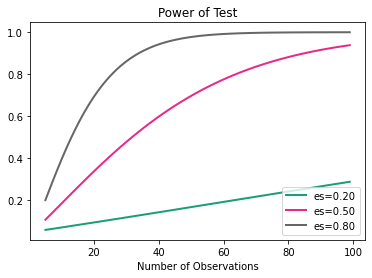

In [37]:
# number of observationをX軸として、検定力の推移をみたい場合
figs = power.plot_power(dep_var='nobs',nobs=np.array(range(5,100)), effect_size=[0.2,0.5,0.8], alpha=0.05)